In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

In [3]:
# Data loading

dataset = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [4]:
dataset.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [5]:
dataset.fillna(dataset.mean(), inplace=True)

In [6]:
dataset.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [7]:
dataset.shape

(23479, 500)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23479 entries, 0 to 23478
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 89.6 MB


In [9]:
from sklearn.preprocessing import StandardScaler
X = dataset.select_dtypes(include=['number'])

std = StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_std

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-1.059338,0.014656,0.362582,-0.347121,-1.766092,-1.050211,0.364297,-0.337571,-1.041261,-1.054826,...,1.688835,-0.093578,-2.176853,-2.152072,-1.597798,-1.026272,-0.697408,-0.085559,-0.703227,-1.012801
1,-1.059338,-0.338270,-1.045524,1.055401,0.351541,-0.345045,-1.048542,-0.337571,0.012764,-0.699535,...,1.688835,-1.575721,0.517245,-0.051532,0.529713,-1.026272,-0.697408,-1.008317,-0.088461,-0.704372
2,-1.059338,-1.044122,-0.341471,0.704770,-1.060215,0.360122,0.364297,-1.398592,0.012764,0.366338,...,-0.693588,-0.390007,-0.680132,-0.651686,-1.293868,-0.407494,0.220476,-0.700731,-0.703227,-0.395944
3,1.791874,-0.338270,-1.749578,0.354140,0.351541,-0.345045,-1.048542,-0.337571,0.364106,-1.054826,...,0.497623,1.092135,-0.081443,-0.351609,-0.686008,1.758230,-0.697408,-0.085559,0.218921,-0.087515
4,0.009867,-2.808751,0.010555,-0.697752,1.410358,-1.050211,0.011087,0.369776,-2.446629,-0.699535,...,-0.693588,-0.686435,0.217901,1.748931,0.529713,-0.716883,0.526437,0.529613,-0.088461,0.837772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23474,1.079071,1.426359,0.714608,-1.749643,0.704480,1.417871,1.423925,0.016103,0.012764,0.011047,...,1.093229,1.684992,0.816589,-0.951763,1.137573,1.758230,-0.085485,0.529613,0.526304,1.454630
23475,0.366268,0.014656,-1.397551,1.756662,-1.413154,0.360122,0.364297,0.016103,0.364106,-0.699535,...,1.688835,1.092135,0.517245,-2.452149,-2.509588,-1.335661,-1.921252,-0.085559,-1.010610,-1.629659
23476,-0.346535,-0.338270,0.362582,-1.048382,-0.001398,1.770454,0.011087,0.369776,-1.041261,0.366338,...,1.093229,-1.575721,-2.176853,-1.551918,-1.293868,-1.645050,-1.921252,-1.008317,-1.625376,-0.704372
23477,0.366268,0.014656,0.362582,-0.347121,-0.707276,0.360122,-1.048542,-0.337571,1.769474,1.432210,...,0.199821,0.499278,1.415278,-0.051532,0.833643,0.520673,-0.085485,-0.700731,-1.010610,0.529343


#Метод главных компонент

In [10]:
from sklearn.decomposition import PCA
X_std.columns = X_std.columns.astype(str)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
pDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [11]:
pca.explained_variance_ratio_

array([0.29822773, 0.03237119])

Встроенный метод главных компонент плохо сработал, описано всего 30 процентов всех данных. Нужно подобрать главные компоненты самостоятельно.

#Разделение на площадь и амплитуду

Text(0, 0.5, 'bit ADC')

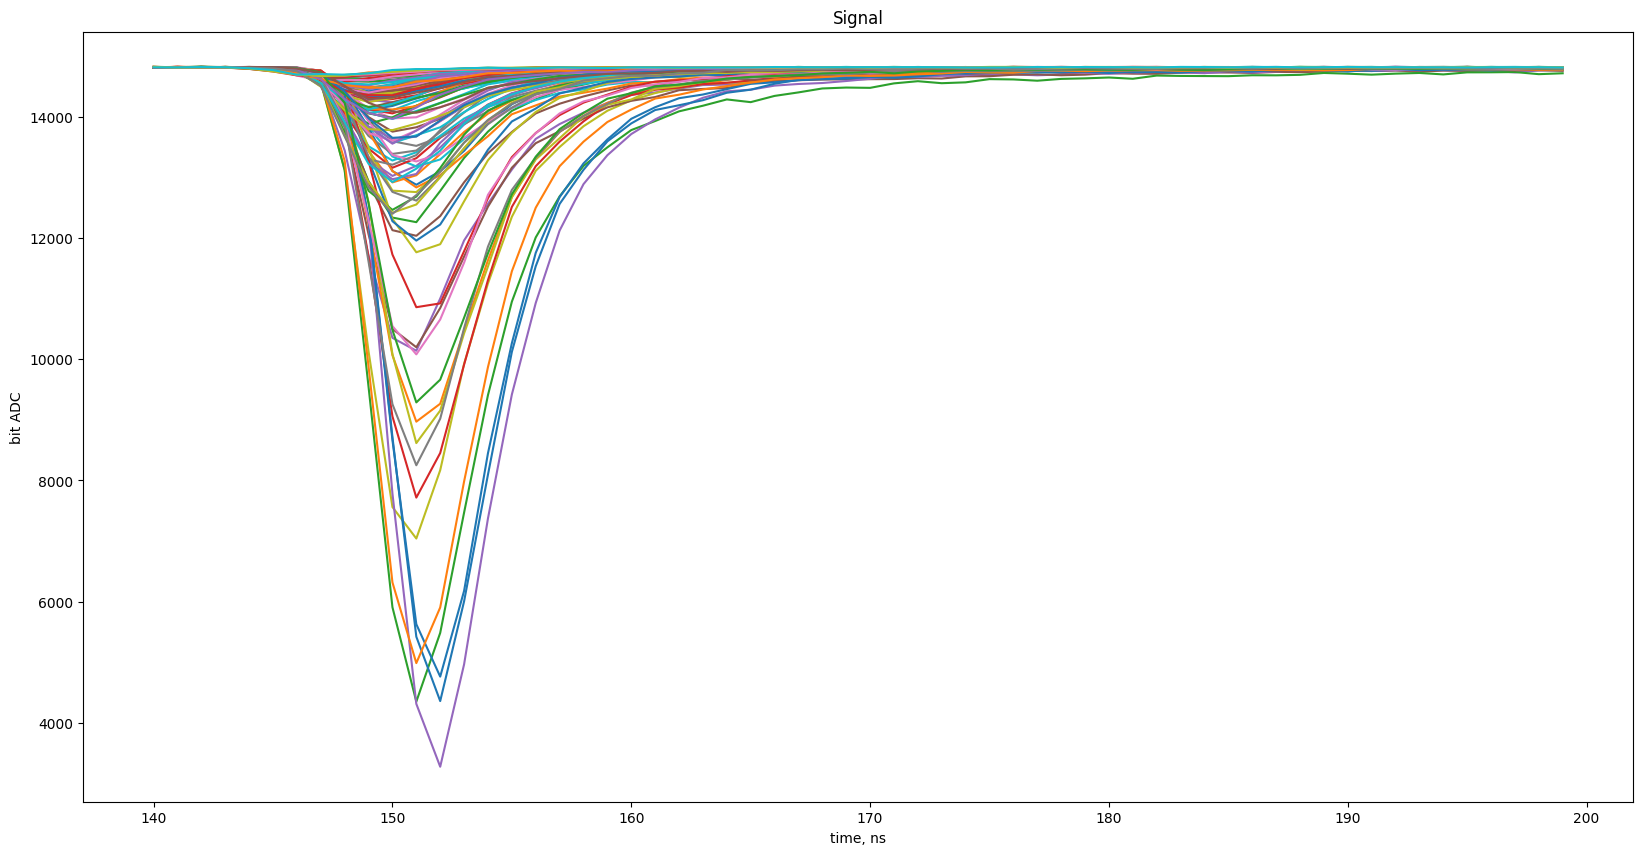

In [12]:
N=range(0, 100)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

[  6   1   6   6   4  10  61 261 446 533 446 364 292 217 194 143  92  83
  76  68  52  45  34  32  25  23  25  27  32  21  26  30  30  10  16  13
  14  17   9  14  17  23  20  20  23  23  14  18  33  11  25  22  20  13
  12  21  21  12   8   5]


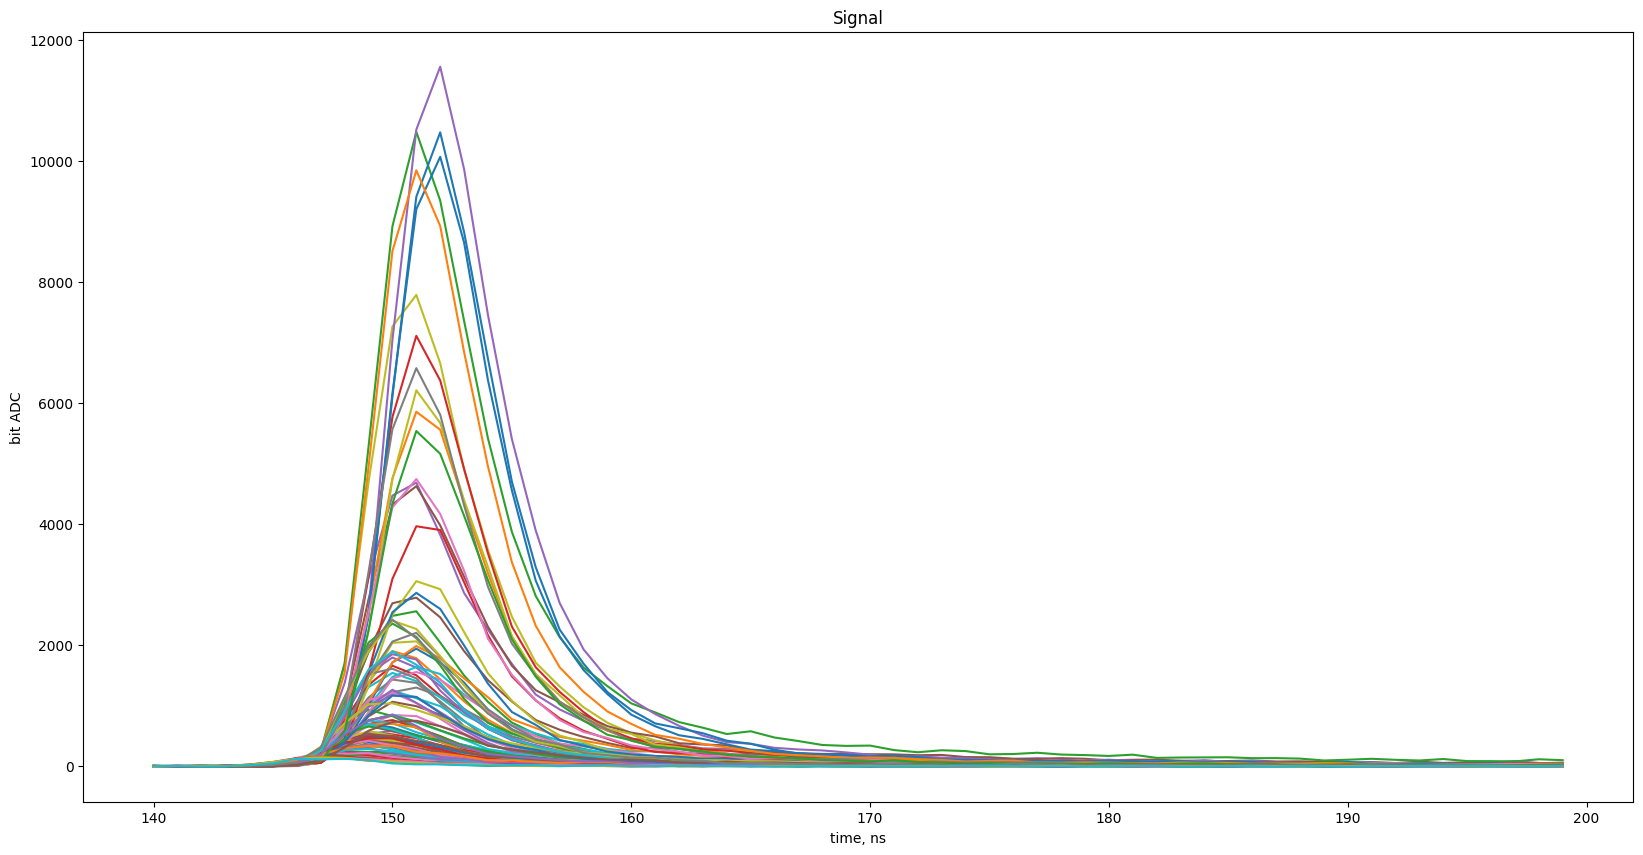

In [13]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")
print(np.array((2**14-dataset.T[0]-1560)[140:200]))

С помощью численных методов вычисляем площадь под графиком, также вычисляем амплитуду сигнала.

In [14]:
def trapeze(x):
    a = 0
    for i in range(len(x)-1):
        a += ((x[i] + x[i+1]) / 2) * 1
    return a #+ np.abs(second_der(i)) * (h**3)/ 12
areas = np.array([0]*23479)
amplitudes = np.array([0]*23479)
for i in range(23479):
  x = np.array(2**14-dataset.T[i]-1560)
  areas[i] = trapeze(x)
  amplitudes[i] = max(x) - min(x)

cl = pd.DataFrame({'areas': areas, 'amplitudes': amplitudes})
cl.index.name = 'index'
cl

,areas,amplitudes
index,,
0,6044,539
1,13109,1907
2,17991,2566
3,5279,573
4,12891,1800
...,...,...
23474,3251,512
23475,45755,5774
23476,39444,5004


Находим прямую, которая поделит график на 2 кластера.

<ipython-input-15-52d48b4a6292>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(areas, amplitudes, s=1,  marker='o', cmap = 'viridus')


0.14687444079534887 -162.94435767824734


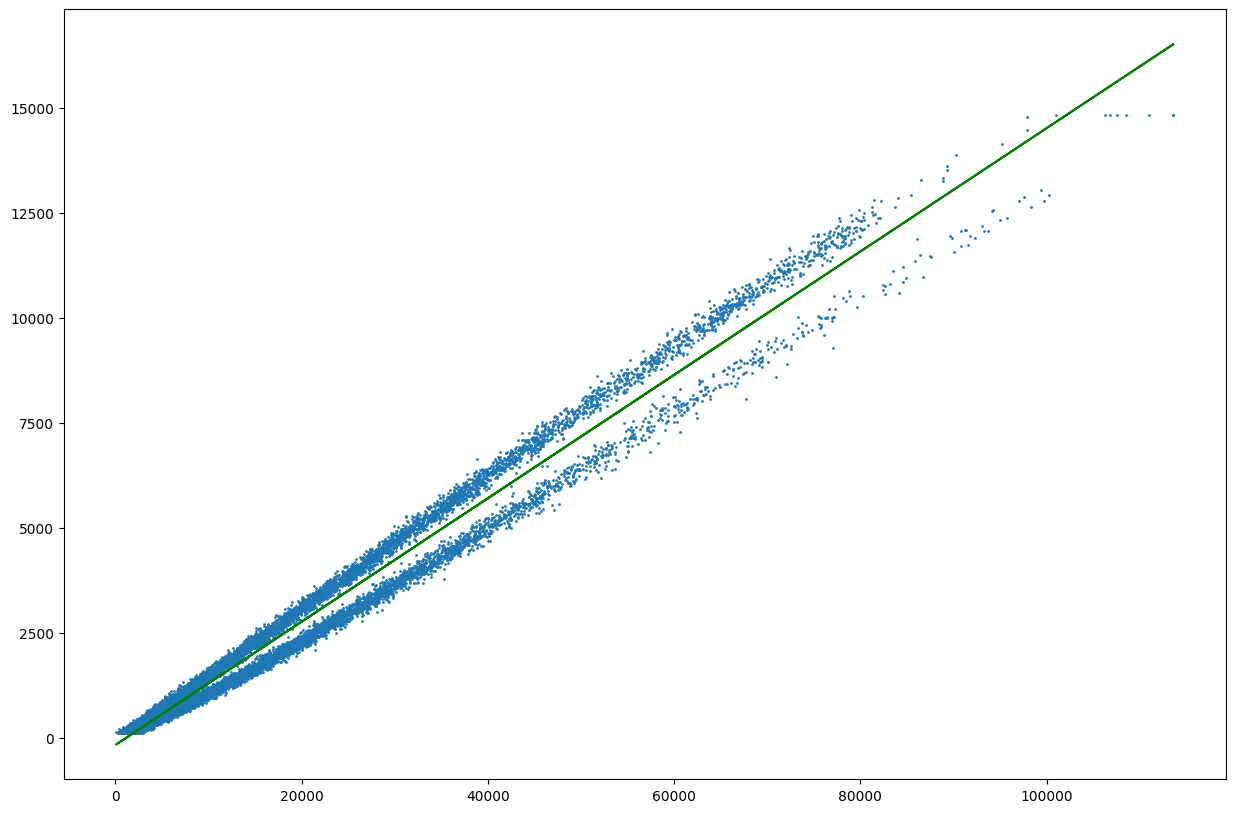

In [15]:
plt.figure(figsize=(15,10))

plt.scatter(areas, amplitudes, s=1,  marker='o', cmap = 'viridus')

A = np.c_[areas, np.ones(areas.shape[0])]

m, c = np.linalg.lstsq(A, amplitudes, rcond=None)[0]
plt.plot(areas,(m) * areas + c, color='green')
print(m, c)

Возьмем середину между кластерами за 3 кластер (там, где точки находятся близко к прямой).

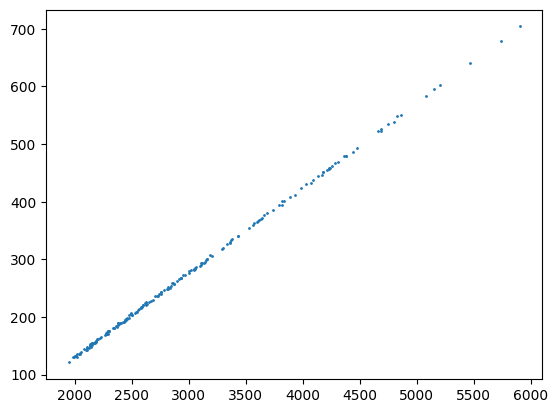

In [16]:
predicted_y = (m) * areas + c #+0.0052
threshold = predicted_y.mean()
pred1 = (amplitudes < predicted_y + 3).astype(int)
pred2 = (amplitudes > predicted_y - 3).astype(int)
pred3 = (areas < 6000).astype(int)
#pr_c_2 = (amplitudes > threshold).astype(int)
#plt.scatter(areas[pr_c_2 == 0], amplitudes[pr_c_2 == 0], s=1,  marker='o')
plt.scatter(areas[(pred1 == 1) & (pred2 == 1) & (pred3 == 1)], amplitudes[(pred1 == 1) & (pred2 == 1) & (pred3 == 1)], s=1,  marker='o')

cl3_1 = pd.DataFrame({'areas': areas[(pred1 == 1) & (pred2 == 1) & (pred3 == 1)], 'amplitudes': amplitudes[(pred1 == 1) & (pred2 == 1) & (pred3 == 1)]})

In [17]:
predicted_y = (m) * areas + c
threshold = predicted_y.mean()


predicted_classes = (amplitudes > predicted_y).astype(int)
pred1 = (amplitudes < predicted_y + 3).astype(int)
pred2 = (amplitudes > predicted_y - 3).astype(int)

cl1 = pd.DataFrame({'areas': areas[predicted_classes == 0], 'amplitudes': amplitudes[predicted_classes == 0]})
cl2 = pd.DataFrame({'areas': areas[predicted_classes == 1], 'amplitudes': amplitudes[predicted_classes == 1]})
# plt.scatter(areas[predicted_classes == 0], amplitudes[predicted_classes == 0], s=1,  marker='o')
# plt.scatter(areas[predicted_classes == 1], amplitudes[predicted_classes == 1], s=1,  marker='o')
# plt.scatter(areas[(pred1 == 1) & (pred2 == 1)], amplitudes[(pred1 == 1) & (pred2 == 1)], s=1,  marker='o')
print(cl1.shape, cl2.shape)

(9828, 2) (13651, 2)


Возьмем слипание графиков в левом конце за 3 кластер

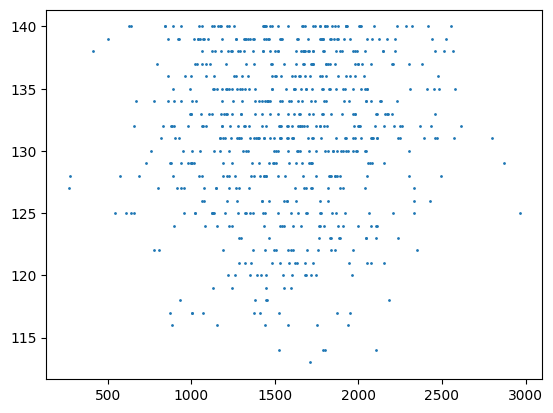

In [18]:
predicted_y = (m+0.0055) * areas + c
threshold = predicted_y.mean()
pr_c_2 = (amplitudes > 140).astype(int)
plt.scatter(areas[pr_c_2 == 0], amplitudes[pr_c_2 == 0], s=1,  marker='o')

cl3_2 = pd.DataFrame({'areas': areas[pr_c_2 == 0], 'amplitudes': amplitudes[pr_c_2 == 0]})

Выберем вариант для 3 кластера

In [19]:
cl3 = cl3_1

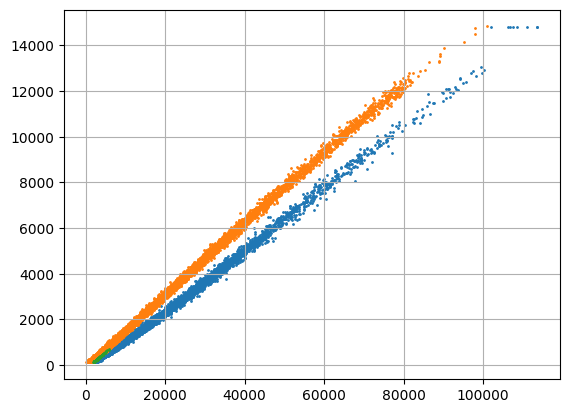

In [20]:
cl1 = cl1[~cl1.set_index(['areas', 'amplitudes']).index.isin(cl3.set_index(['areas', 'amplitudes']).index)].reset_index(drop=True)
cl2 = cl2[~cl2.set_index(['areas', 'amplitudes']).index.isin(cl3.set_index(['areas', 'amplitudes']).index)].reset_index(drop=True)
plt.scatter(cl1['areas'], cl1['amplitudes'], s=1,  marker='o')
plt.scatter(cl2['areas'], cl2['amplitudes'], s=1,  marker='o')
plt.scatter(cl3['areas'], cl3['amplitudes'], s=1, marker='o')
plt.grid()

In [21]:
cl1['cluster1'] = 0
cl2['cluster2'] = 1
cl3['cluster3'] = 2
print(cl1.shape, cl2.shape, cl3.shape, cl.shape)

(9724, 3) (13560, 3) (195, 3) (23479, 2)


Соединяем данные в один датафрейм.

In [22]:
cl0 = cl.merge(cl1.drop_duplicates(), on=['areas', 'amplitudes'], how='left')
cl0 = cl0.merge(cl2.drop_duplicates(), on=['areas', 'amplitudes'], how='left')
cl0 = cl0.merge(cl3.drop_duplicates(), on=['areas', 'amplitudes'], how='left')
cl0['cluster'] = cl0['cluster1'].combine_first(cl0['cluster2']).combine_first(cl0['cluster3'])
cl0

,areas,amplitudes,cluster1,cluster2,cluster3,cluster
0,6044,539,0.0,NaN,NaN,0.0
1,13109,1907,NaN,1.0,NaN,1.0
2,17991,2566,NaN,1.0,NaN,1.0
3,5279,573,0.0,NaN,NaN,0.0
4,12891,1800,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...
23474,3251,512,NaN,1.0,NaN,1.0
23475,45755,5774,0.0,NaN,NaN,0.0
23476,39444,5004,0.0,NaN,NaN,0.0
23477,12833,1464,0.0,NaN,NaN,0.0


<Axes: xlabel='areas', ylabel='amplitudes'>

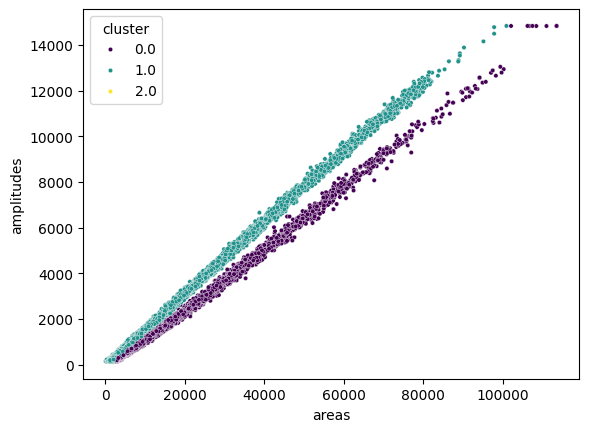

In [23]:
cl0.drop(columns = ['cluster1', 'cluster2', 'cluster3'], inplace=True)
import seaborn as sns
sns.scatterplot(data=cl0, x='areas', y='amplitudes', hue='cluster', palette='viridis', s=10)

In [24]:
answer = pd.DataFrame({'cluster': cl0['cluster'].astype(int)})
#answer = answer.sort_values(by='cluster', 'index')
answer.index.name = 'index'
answer = answer.sort_values(by=['cluster'])
print(answer)
answer.to_csv('answer.csv', index=True)

       cluster
index         
0            0
12185        0
19082        0
19081        0
7079         0
...        ...
2624         2
11616        2
13146        2
21696        2
21800        2

[23479 rows x 1 columns]
